## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

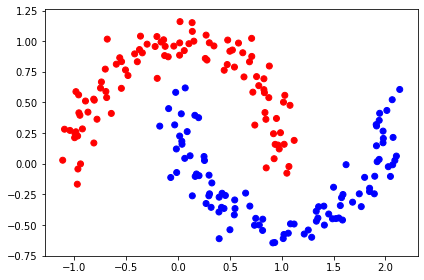

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [4]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

In [5]:

#Let's first create neural network with 1 layer 
# To add a layer to the architecture, you would simply use .add(LAYER).
# Each "input_dim" of each layer should be the number units in the previous layer 
# (in this case the input), and the number of "units" should be the number of 
# outputs of the layer (in this case it will be 1).


#Write your code here: (2 lines)
perceptron = Sequential()
perceptron.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [6]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
#Now we train the built perceptron
#Write your code here: (1 line)
perceptron.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1)


Epoch 1/10
160/160 [==============================] - 0s 931us/sample - loss: 0.8316
Epoch 2/10
160/160 [==============================] - 0s 31us/sample - loss: 0.8294
Epoch 3/10
160/160 [==============================] - 0s 38us/sample - loss: 0.8260
Epoch 4/10
160/160 [==============================] - 0s 37us/sample - loss: 0.8217
Epoch 5/10
160/160 [==============================] - 0s 38us/sample - loss: 0.8170
Epoch 6/10
160/160 [==============================] - 0s 38us/sample - loss: 0.8121
Epoch 7/10
160/160 [==============================] - 0s 38us/sample - loss: 0.8073
Epoch 8/10
160/160 [==============================] - 0s 31us/sample - loss: 0.8020
Epoch 9/10
160/160 [==============================] - 0s 44us/sample - loss: 0.7973
Epoch 10/10
160/160 [==============================] - 0s 44us/sample - loss: 0.7922


In [8]:
from utils import get_accuracy

In [9]:
# And test it on training and test set 
get_accuracy(perceptron, X_test, y_test)

0.375

Text(12.375, 0.5, 'Test')

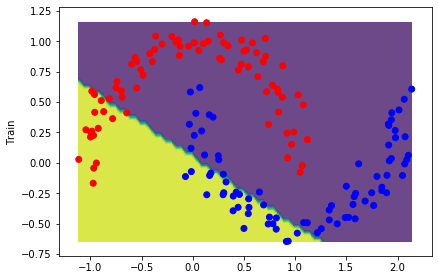

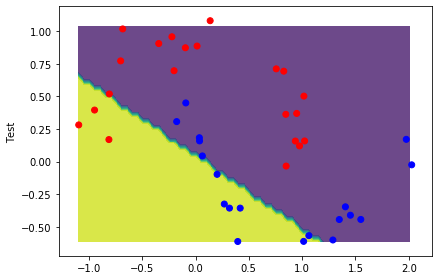

In [10]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the first exercise, use Keras to create a 2 layer neural network by completing build_one_output_model() in exercise_3.py. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [11]:
from exercise_3 import build_one_output_model
model = build_one_output_model()

In [12]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
get_accuracy(model, X_test, y_test)

0.75

Text(12.375, 0.5, 'Test')

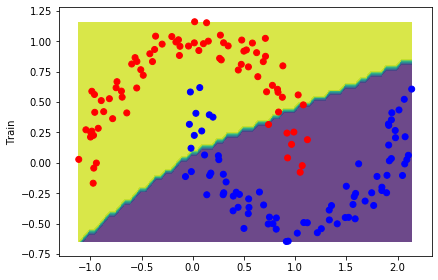

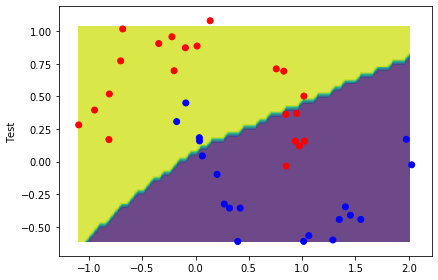

In [13]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [14]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [15]:
y_train_vectorized[:, 1]

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0.], dtype=float32)

In [16]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Implement build_classification_model() in exercise_3.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [17]:
from exercise_3 import build_classification_model

In [18]:
model = build_classification_model()

Use the below calls to test your implementation

In [19]:
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=10, verbose = 1)

Epoch 1/1000
160/160 [==============================] - 0s 619us/sample - loss: 0.6593 - acc: 0.7125
Epoch 2/1000
160/160 [==============================] - 0s 94us/sample - loss: 0.6455 - acc: 0.7625
Epoch 3/1000
160/160 [==============================] - 0s 88us/sample - loss: 0.6239 - acc: 0.8750
Epoch 4/1000
160/160 [==============================] - 0s 87us/sample - loss: 0.6012 - acc: 0.8875
Epoch 5/1000
160/160 [==============================] - 0s 94us/sample - loss: 0.5787 - acc: 0.8813
Epoch 6/1000
160/160 [==============================] - 0s 87us/sample - loss: 0.5554 - acc: 0.8750
Epoch 7/1000
160/160 [==============================] - 0s 87us/sample - loss: 0.5322 - acc: 0.8687
Epoch 8/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.5097 - acc: 0.8687
Epoch 9/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.4873 - acc: 0.8687
Epoch 10/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.4663 - acc: 0.868

160/160 [==============================] - 0s 75us/sample - loss: 0.2111 - acc: 0.9062
Epoch 162/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2111 - acc: 0.9062
Epoch 163/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2117 - acc: 0.9062
Epoch 164/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2104 - acc: 0.9062
Epoch 165/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2109 - acc: 0.9062
Epoch 166/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.2117 - acc: 0.9062
Epoch 167/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2100 - acc: 0.9062
Epoch 168/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2098 - acc: 0.9062
Epoch 169/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.2093 - acc: 0.9062
Epoch 170/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.2093 - acc: 0.

160/160 [==============================] - 0s 75us/sample - loss: 0.1435 - acc: 0.9500
Epoch 322/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.1415 - acc: 0.9563
Epoch 323/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1406 - acc: 0.9563
Epoch 324/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1406 - acc: 0.9563
Epoch 325/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.1390 - acc: 0.9563
Epoch 326/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1394 - acc: 0.9500
Epoch 327/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1378 - acc: 0.9563
Epoch 328/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1372 - acc: 0.9563
Epoch 329/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1363 - acc: 0.9563
Epoch 330/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.1350 - acc: 0.

160/160 [==============================] - 0s 75us/sample - loss: 0.0421 - acc: 0.9937
Epoch 482/1000
160/160 [==============================] - 0s 88us/sample - loss: 0.0419 - acc: 1.0000
Epoch 483/1000
160/160 [==============================] - 0s 88us/sample - loss: 0.0414 - acc: 1.0000
Epoch 484/1000
160/160 [==============================] - 0s 94us/sample - loss: 0.0408 - acc: 1.0000
Epoch 485/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0405 - acc: 1.0000
Epoch 486/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0407 - acc: 1.0000
Epoch 487/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0399 - acc: 1.0000
Epoch 488/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0399 - acc: 1.0000
Epoch 489/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0394 - acc: 1.0000
Epoch 490/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.0394 - acc: 1.

160/160 [==============================] - 0s 75us/sample - loss: 0.0167 - acc: 1.0000
Epoch 642/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0169 - acc: 1.0000
Epoch 643/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.0167 - acc: 1.0000
Epoch 644/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0165 - acc: 1.0000
Epoch 645/1000
160/160 [==============================] - 0s 88us/sample - loss: 0.0165 - acc: 1.0000
Epoch 646/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0165 - acc: 1.0000
Epoch 647/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0164 - acc: 1.0000
Epoch 648/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0163 - acc: 1.0000
Epoch 649/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0164 - acc: 1.0000
Epoch 650/1000
160/160 [==============================] - 0s 100us/sample - loss: 0.0161 - acc: 1

160/160 [==============================] - 0s 69us/sample - loss: 0.0093 - acc: 1.0000
Epoch 802/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.0093 - acc: 1.0000
Epoch 803/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0093 - acc: 1.0000
Epoch 804/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0092 - acc: 1.0000
Epoch 805/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0092 - acc: 1.0000
Epoch 806/1000
160/160 [==============================] - 0s 69us/sample - loss: 0.0092 - acc: 1.0000
Epoch 807/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0092 - acc: 1.0000
Epoch 808/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0092 - acc: 1.0000
Epoch 809/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0092 - acc: 1.0000
Epoch 810/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0091 - acc: 1.

160/160 [==============================] - 0s 75us/sample - loss: 0.0061 - acc: 1.0000
Epoch 962/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.0061 - acc: 1.0000
Epoch 963/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.0061 - acc: 1.0000
Epoch 964/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0061 - acc: 1.0000
Epoch 965/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0061 - acc: 1.0000
Epoch 966/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0061 - acc: 1.0000
Epoch 967/1000
160/160 [==============================] - 0s 81us/sample - loss: 0.0061 - acc: 1.0000
Epoch 968/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0060 - acc: 1.0000
Epoch 969/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0060 - acc: 1.0000
Epoch 970/1000
160/160 [==============================] - 0s 75us/sample - loss: 0.0060 - acc: 1.

In [20]:
get_accuracy(model, X_test, y_test)

1.0

Text(12.375, 0.5, 'Test')

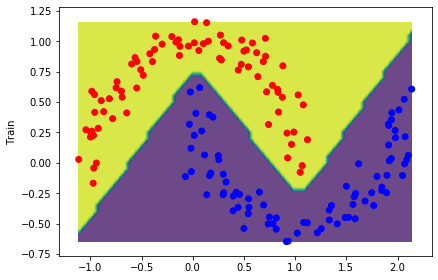

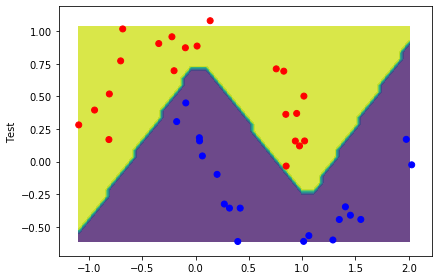

In [21]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:

Now let's revisit the classification problem in Homework2. Build a neural network to predict the output in the banking marketing dataset. The architecture choice is up to you, but you are required to  use Dense layers only.
features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function in exercise_3.py and use the below functions to train/test your code. 

In [22]:
from exercise_3 import build_final_model

In [23]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from typing import List
import seaborn as sns
from sklearn.utils import shuffle

class PreProcessor:
    """
    Preprocessing utility class which is going to be used for
    updating all the categorical datasets and it splits the data
    into train, cv and test datasets.
    """
    def __init__(self, df: pd.DataFrame, columns: List, target: pd.DataFrame):
        """
        Instantiate the object's attributes.
        """
        # Base conditions
        if df.empty or target.empty or len(target) != len(df) - 678:
            raise Exception("Incorrect parameters")
        self.df = df.copy(deep=True)
        self.columns = columns[:]
        self.target = target.copy(deep=True)
        # Split data attributes
        self.X_train, self.y_train = {}, {}
        self.X_cv, self.y_cv = {}, {}
        self.X_test = {}
        # Continuous variables
        self.continuous_variables_columns = df.select_dtypes(exclude=['object']).columns[:]
        self.plot_data_distribution(target)

    def plot_data_distribution(self, target: pd.DataFrame, at="y"):
        """
        Shows the distribution of the data
        """
        if not target.empty:
            sns.countplot(x=at, data=target)
        
    def transform_data(self):
        """
        This function allows us to understand how we need to handle the columns which
        are categorical and which are not. After applying the necessary transformations,
        using to_categorical for testing data and pd.get_dummies, it is able to pass the values back.
        """
        temp_df = self.df[self.columns].copy()
        # All categorical data
        categorical_df = temp_df.select_dtypes(include=['object'])
        # All numeric data
        temp_df = temp_df.select_dtypes(exclude=['object'])

        if (not(categorical_df.empty)):
            encode_df = pd.DataFrame()
            for col in categorical_df:
                one_hot = pd.get_dummies(categorical_df[col], drop_first=True, prefix=col)
                encode_df = pd.concat([encode_df, one_hot], axis=1)
            else:
                self.df = pd.concat([temp_df, encode_df], axis=1)
                self.columns = self.df.columns
        else:
            self.df = temp_df
    
    def transform_test_data(self):
        """
        This function only transforms the target variable
        """
        target = pd.get_dummies(self.target, drop_first=True)
        # On encoding note that 0 represents a 'No' and 1 represents a 'Yes'
        self.target = to_categorical(target.astype('int').astype('category'))

    def transform(self):
        """
        Function to transform everything
        """
        self.transform_data()
        self.transform_test_data()
        
        
    def split_data(self, split_for_train=3165, split_for_cv=3843):
        """
        This function is going to split the data into 3 separate sets (train, cv and test)
        """
        # Training data
        self.X_train, self.y_train = self.df[:split_for_train], self.target[:split_for_train]
        # CV data
        self.X_cv, self.y_cv = self.df[split_for_train:split_for_cv], self.target[split_for_train:split_for_cv]
        # Test data
        self.X_test = self.df[split_for_cv: ]
    
    def standardize_data(self):
        """
        Standardize dataset
        """
        continuous_columns = self.continuous_variables_columns
        scaler = preprocessing.StandardScaler().fit(self.X_train[continuous_columns])
        self.X_train[continuous_columns] = scaler.transform(self.X_train[continuous_columns])
        # Scaling all other data
        self.X_cv[continuous_columns] = scaler.transform(self.X_cv[continuous_columns])
        self.X_test[continuous_columns] = scaler.transform(self.X_test[continuous_columns])
    
    def oversampling(self):
        """
        Function performs oversampling using smote. This will be used later
        """
        sm = SMOTE(random_state = 2) 
        num_of_target = len(self.target[:, 1])
        print(self.df[:num_of_target].shape, num_of_target)
        # Splice the data and preserve testing data
        spliced_df = self.df[:num_of_target]
        test_data = self.df[num_of_target:]
        X_train_res, y_train_res = sm.fit_sample(spliced_df, self.target[:, 1])
        print('oversampling leads to dataset of :', X_train_res.shape)
        # Need to shuffle the data a bit more
        _x, _y = self.shuffler(X_train_res, y_train_res, test_data.columns)

        self.plot_data_distribution(_y)
        # Need to add the testing data back to the values
        self.df = pd.concat([_x, test_data])
        print(self.df.shape)
        self.target = to_categorical(_y.astype('int').astype('category'))
        
    def shuffler(self, X, y, columns):
        """
        Need to perform shuffling
        """
        _y = pd.DataFrame({'y': y})
        _x = pd.DataFrame(X, columns = columns)
        # Merge the 2 dataframes so that we can shuffle and then split
        _df = pd.merge(_x, _y, left_index=True, right_index=True)
        # Shuffling
        _df = shuffle(_df)
        # Returning x and y
        return _df.loc[:, _df.columns != 'y'], _df[['y']]        
        
        
pd.options.mode.chained_assignment = None
# obj = PreProcessor(train_df, train_df.columns, test_df)
# obj.transform()
# obj.split_data()
# obj.standardize_data()

C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


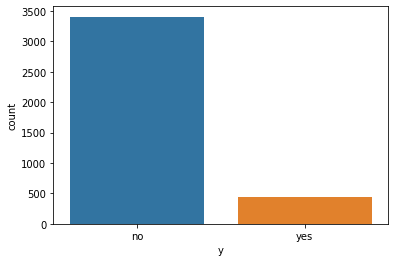

In [24]:
#Read the data
train_df = pd.read_excel('features_ex2.xlsx')
test_df = pd.read_excel('label_ex2.xlsx')
#Convert categorical variables into one-hot encodings(including the output variable consisting of "yes" or "no")
obj = PreProcessor(train_df, train_df.columns, test_df)
obj.transform()

#Split data into train, validation and test set (70:15:15 ratio)
obj.split_data()

#Apply standardization to continuous values
obj.standardize_data()

## Checking results when we balanced our datasets

(3843, 41) 3843
oversampling leads to dataset of : (6810, 41)
(7488, 41)


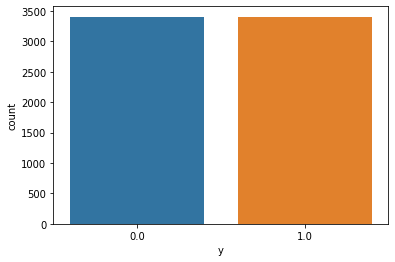

In [25]:
# Also creating a balanced obj to test how our model would perform when we synthesis and make our dataset more balanced
balanced_obj = PreProcessor(train_df, train_df.columns, test_df)
balanced_obj.transform()
balanced_obj.oversampling()
balanced_obj.split_data(5241, len(balanced_obj.df)-len(obj.X_test))
balanced_obj.standardize_data()

In [26]:
model = build_final_model()
model_with_dropout = build_final_model(True)

In [27]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

In [28]:
# With unbalanced data
model.fit(obj.X_train, obj.y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
3165/3165 [==============================] - 1s 195us/sample - loss: 0.3877 - acc: 0.8844
Epoch 2/100
3165/3165 [==============================] - 0s 153us/sample - loss: 0.3371 - acc: 0.8844
Epoch 3/100
3165/3165 [==============================] - 1s 177us/sample - loss: 0.3305 - acc: 0.8844
Epoch 4/100
3165/3165 [==============================] - 1s 163us/sample - loss: 0.3266 - acc: 0.8844
Epoch 5/100
3165/3165 [==============================] - 1s 161us/sample - loss: 0.3236 - acc: 0.8844
Epoch 6/100
3165/3165 [==============================] - 0s 158us/sample - loss: 0.3200 - acc: 0.8844
Epoch 7/100
3165/3165 [==============================] - 0s 148us/sample - loss: 0.3175 - acc: 0.8844
Epoch 8/100
3165/3165 [==============================] - 0s 157us/sample - loss: 0.3152 - acc: 0.8844
Epoch 9/100
3165/3165 [==============================] - 1s 169us/sample - loss: 0.3121 - acc: 0.8844
Epoch 10/100
3165/3165 [==============================] - 1s 159us/sample - loss: 

{'accuracy score': 0.8687315634218289, 'precision score': 0.3508771929824561, 'recall score': 0.2777777777777778}


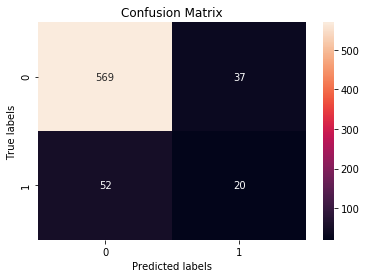

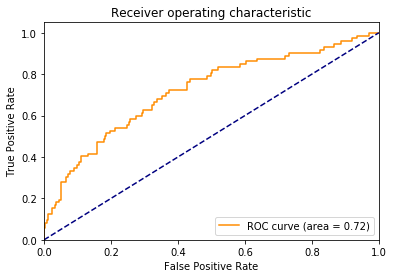

In [29]:
y_cv_test = model.predict_classes(obj.X_cv)

from utils import get_scores, plot_confusion_matrix, plot_roc_curve

print(get_scores(model, obj.X_cv, obj.y_cv[:, 1]))
plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(obj.y_cv[:, 1], model.predict_proba(obj.X_cv)[:, 1])


### With dropout

In [30]:
model_with_dropout.fit(balanced_obj.X_train, balanced_obj.y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
5241/5241 [==============================] - 1s 238us/sample - loss: 0.6747 - acc: 0.5787
Epoch 2/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.6394 - acc: 0.6369
Epoch 3/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.6077 - acc: 0.6649
Epoch 4/100
5241/5241 [==============================] - 1s 221us/sample - loss: 0.5891 - acc: 0.6884
Epoch 5/100
5241/5241 [==============================] - 1s 229us/sample - loss: 0.5656 - acc: 0.7096
Epoch 6/100
5241/5241 [==============================] - 1s 221us/sample - loss: 0.5453 - acc: 0.7216
Epoch 7/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.5200 - acc: 0.7521
Epoch 8/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.4979 - acc: 0.7655
Epoch 9/100
5241/5241 [==============================] - 1s 224us/sample - loss: 0.4811 - acc: 0.7783
Epoch 10/100
5241/5241 [==============================] - 1s 224us/sample - loss: 

{'accuracy score': 0.9410029498525073, 'precision score': 0.66, 'recall score': 0.9166666666666666}


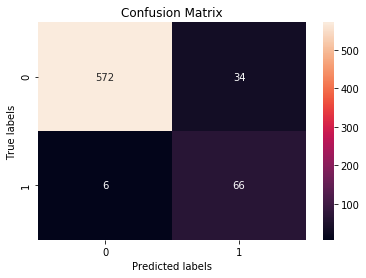

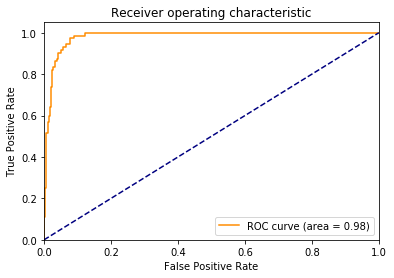

In [31]:
y_cv_test = model_with_dropout.predict_classes(obj.X_cv)
print(get_scores(model_with_dropout, obj.X_cv, obj.y_cv[:, 1]))
plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(obj.y_cv[:, 1], model_with_dropout.predict_proba(obj.X_cv)[:, 1])

### With a balanced Dataset

In [32]:
# With balanced data
model = build_final_model()
model.fit(balanced_obj.X_train, balanced_obj.y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
5241/5241 [==============================] - 1s 192us/sample - loss: 0.6719 - acc: 0.6089
Epoch 2/100
5241/5241 [==============================] - 1s 174us/sample - loss: 0.6091 - acc: 0.6913
Epoch 3/100
5241/5241 [==============================] - 1s 161us/sample - loss: 0.5371 - acc: 0.7430
Epoch 4/100
5241/5241 [==============================] - 1s 185us/sample - loss: 0.4750 - acc: 0.7903
Epoch 5/100
5241/5241 [==============================] - 1s 177us/sample - loss: 0.4166 - acc: 0.8264
Epoch 6/100
5241/5241 [==============================] - 1s 181us/sample - loss: 0.3646 - acc: 0.8592
Epoch 7/100
5241/5241 [==============================] - 1s 203us/sample - loss: 0.3242 - acc: 0.8693
Epoch 8/100
5241/5241 [==============================] - 1s 177us/sample - loss: 0.2888 - acc: 0.8859
Epoch 9/100
5241/5241 [==============================] - 1s 152us/sample - loss: 0.2585 - acc: 0.8962
Epoch 10/100
5241/5241 [==============================] - 1s 150us/sample - loss: 

{'accuracy score': 0.9330783938814532, 'precision score': 0.8978622327790974, 'recall score': 0.9754838709677419}


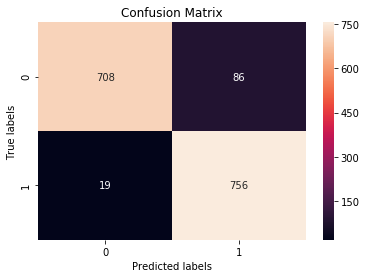

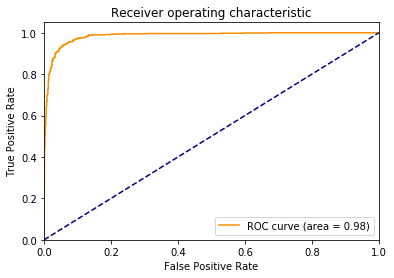

In [33]:
y_cv_test = model.predict_classes(balanced_obj.X_cv)

# print(model.predict_proba(obj.X_cv)[:, 1].reshape(-1, 1))
print(get_scores(model, balanced_obj.X_cv, balanced_obj.y_cv[:, 1]))
plot_confusion_matrix(balanced_obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(balanced_obj.y_cv[:, 1], model.predict_proba(balanced_obj.X_cv)[:, 1])

### Balanced data with Dropout to avoid overfitting

In [34]:
model_with_dropout = build_final_model(True)
model_with_dropout.fit(balanced_obj.X_train, balanced_obj.y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
5241/5241 [==============================] - 1s 242us/sample - loss: 0.6773 - acc: 0.5753
Epoch 2/100
5241/5241 [==============================] - 1s 218us/sample - loss: 0.6377 - acc: 0.6329
Epoch 3/100
5241/5241 [==============================] - 1s 221us/sample - loss: 0.6069 - acc: 0.6669
Epoch 4/100
5241/5241 [==============================] - 1s 228us/sample - loss: 0.5833 - acc: 0.6915
Epoch 5/100
5241/5241 [==============================] - 1s 231us/sample - loss: 0.5545 - acc: 0.7121
Epoch 6/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.5386 - acc: 0.7289
Epoch 7/100
5241/5241 [==============================] - 1s 218us/sample - loss: 0.5291 - acc: 0.7424
Epoch 8/100
5241/5241 [==============================] - 1s 217us/sample - loss: 0.4971 - acc: 0.7682
Epoch 9/100
5241/5241 [==============================] - 1s 220us/sample - loss: 0.4710 - acc: 0.7869
Epoch 10/100
5241/5241 [==============================] - 1s 222us/sample - loss: 

5241/5241 [==============================] - 1s 231us/sample - loss: 0.1254 - acc: 0.9517
Epoch 81/100
5241/5241 [==============================] - 1s 223us/sample - loss: 0.1162 - acc: 0.9536
Epoch 82/100
5241/5241 [==============================] - 1s 219us/sample - loss: 0.1107 - acc: 0.9580
Epoch 83/100
5241/5241 [==============================] - 1s 217us/sample - loss: 0.1142 - acc: 0.9512
Epoch 84/100
5241/5241 [==============================] - 1s 218us/sample - loss: 0.1186 - acc: 0.9536
Epoch 85/100
5241/5241 [==============================] - 1s 220us/sample - loss: 0.1138 - acc: 0.9550
Epoch 86/100
5241/5241 [==============================] - 1s 233us/sample - loss: 0.1172 - acc: 0.9527
Epoch 87/100
5241/5241 [==============================] - 1s 230us/sample - loss: 0.1086 - acc: 0.9580
Epoch 88/100
5241/5241 [==============================] - 1s 222us/sample - loss: 0.1138 - acc: 0.9548
Epoch 89/100
5241/5241 [==============================] - 1s 221us/sample - loss: 0.10

{'accuracy score': 0.9254302103250478, 'precision score': 0.8983050847457628, 'recall score': 0.9574193548387097}


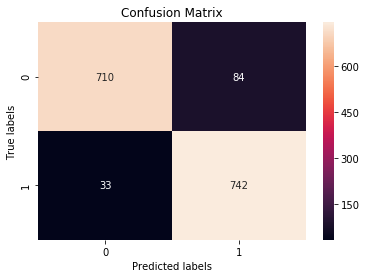

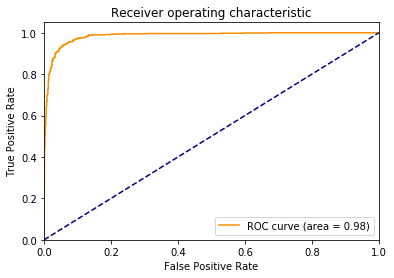

In [35]:
y_cv_test = model_with_dropout.predict_classes(balanced_obj.X_cv)

print(get_scores(model_with_dropout, balanced_obj.X_cv, balanced_obj.y_cv[:, 1]))
plot_confusion_matrix(balanced_obj.y_cv[:, 1], y_cv_test)
plot_roc_curve(balanced_obj.y_cv[:, 1], model.predict_proba(balanced_obj.X_cv)[:, 1])

In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models.

In [36]:
from exercise_3 import logistic_regression_model

In [37]:
def computer(model, obj):
    """
    Provides the necessary outputs
    """
    #fit the model
    model.fit(obj.X_train, obj.y_train[:, 1])
    #obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
    y_cv_test = model.predict(obj.X_cv)

    print(get_scores(model, obj.X_cv, obj.y_cv[:, 1], True))
    plot_confusion_matrix(obj.y_cv[:, 1], y_cv_test)
    plot_roc_curve(obj.y_cv[:, 1], model.predict_proba(obj.X_cv)[:, 1])


### Logistic Regression

In [38]:
# With a model which is not tuned
model = logistic_regression_model()

{'accuracy score': 0.8923303834808259, 'precision score': 0.47368421052631576, 'recall score': 0.125}


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


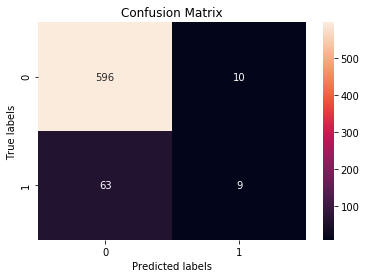

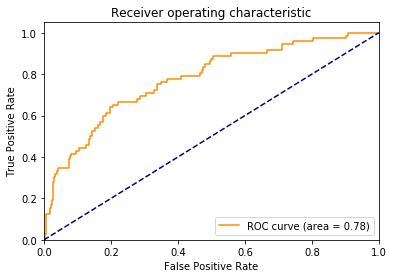

In [39]:
#fit the model
computer(model, obj)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.1s finished


Logistic Regession parameters:  {'C': 29.763514416313132, 'penalty': 'l2', 'solver': 'liblinear'}
{'accuracy score': 0.8923303834808259, 'precision score': 0.4782608695652174, 'recall score': 0.1527777777777778}


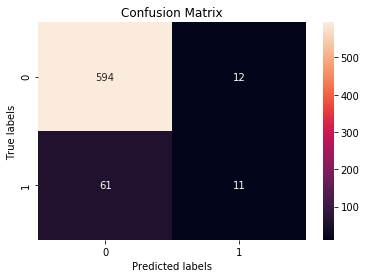

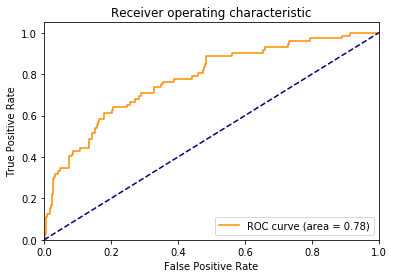

In [40]:
# With a tuned model
model = logistic_regression_model(True, obj.X_train, obj.y_train[:, 1])
computer(model, obj)

**Note** that there is only a small increment on the recall score after the tuned our hyperparameters

### Random Forest

In [41]:
from exercise_3 import random_forest_model

In [42]:
model = random_forest_model()

{'accuracy score': 0.8923303834808259, 'precision score': 0.48, 'recall score': 0.16666666666666666}


C:\Users\patri\Anaconda3\envs\tf_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


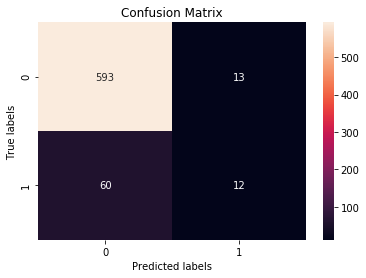

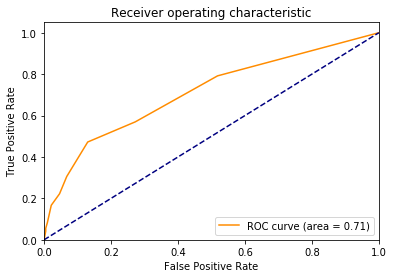

In [43]:
#fit the model
computer(model, obj)

Fitting 3 folds for each of 2520 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1256 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 5628 tasks      | elapsed:  1.1min


Random Forest parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 5}
{'accuracy score': 0.8952802359882006, 'precision score': 0.5333333333333333, 'recall score': 0.1111111111111111}


[Parallel(n_jobs=-1)]: Done 7560 out of 7560 | elapsed:  1.5min finished


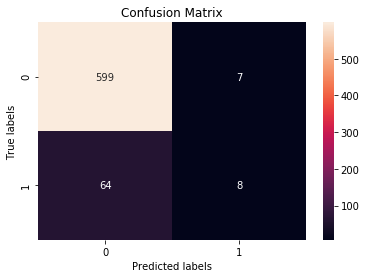

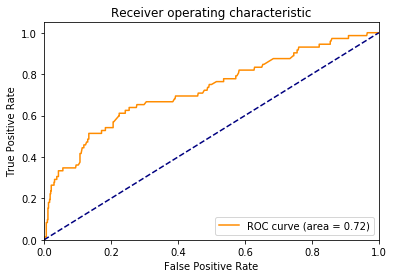

In [44]:
# Tuned hyperparameters
model = random_forest_model(True, obj.X_train, obj.y_train[:, 1])
computer(model, obj)

**Note** that there is only a small increment on the precision score at the expense of the recall score after we tuned our hyperparameters. Also, notice that the depth of the tree is 8.

### Question

Which of the above 3 models worked best for you? Explain the reason for good/bad performance for each of the models.

### Answer

When we use **neural networks on our unbalanced dataset** we can see that there are a few issues with our precision score and recall score. As the network assigns weights on each node in each layer, it is able to adjust its weights to get the most probable class but due to the low frequency of yes values, it is not able to predict properly and leads to higher False negatives and False Positives. While this is the case, it doesn't compromise on either one of the metrics. One way to resolve this issue is by using dropout layers. This would allow our model to learn the parameters and make more accurate predictions using useful metrics.

When we use **logistic regression** we can see a similar issue with our precision score and recall score. As the network assigns tries to assign weights and understand the probability it still faces the same problem of having too many FN and FP. Though we trained our model to take the best parameters possible, it was still not able to give a better accuracy score than the neural network. However, the precision of the model is much better than the neural network without dropout layers. This is because the model compromized on the FN (affecting the recall score) and reduced the number of FP, thus improving the precision.

When we use **random forests** we see a slight increase in our accuracy and our precision is improved at our cost of our recall score (with the tuned model). This again takes place due to the issue with our dataset. Although, when we perform hyperparameter tuning we see that the number of levels which has been selected is 8, denoting that there might be a chance of some overfitting.

### Question
Using the best of the above 3 models, obtain predictions for the test set. Submit these predictions in a csv. 

**Ans:**
The answer depends on several scenarios. If we care about our *precision score*, we don't have much *computation power* and need to understand how and what is happening in our model, then we should use Logistic Regression as it is able to classify the best (using AUC) and its easier to understand how the weights have been assigned. We assume here that due to the high depth of the Random Forest, there might be a case of overfitting and using such a heavy (ensemble) model for a small increment in the precision score is not worth it. Additionally, this would work best against an imbalanced dataset.   

*The ideal scenario* in our case would be to first balance our dataset using SMOTE. If the data can be faked then this is the best path to go. We can see from the results that when we balance our dataset, our neural network performs way better with the accuracy score, precision score and recall score ~ 0.90. Additionally, using SMOTE also alleviates some of the problems with small datasets and introduces more observations to train on.

Furthermore, we also, believe that *recall* is the parameter that we must look at as (according to the question) it might be more detrimental to miss out on customers i.e. False negative. Thus, we must increase our recall score by reducing the FN. This is under the assumption that cost really doesn't matter while targetting people and we are okay with false positives.

Therefore, if we don't have any issues with computation and the time taken for the neural network to train and if we believe that the data is enough for the NN to train on, then neural networks with Dropout (to reduce overfitting) outperforms any other model (whether it is for an imbalanced or balanced dataset). Hence, we should be using **neural networks with dense and dropout layers to predict our labels**.

### With balanced dataset

In [45]:
model = build_final_model(True)
model.fit(pd.concat([balanced_obj.X_train, balanced_obj.X_cv]),
          np.concatenate([balanced_obj.y_train, balanced_obj.y_cv]),
          epochs=100, batch_size=10, verbose = 1)

y_test = model.predict_classes(balanced_obj.X_test)


Epoch 1/100
6810/6810 [==============================] - 2s 239us/sample - loss: 0.6700 - acc: 0.5815
Epoch 2/100
6810/6810 [==============================] - 2s 232us/sample - loss: 0.6302 - acc: 0.6421
Epoch 3/100
6810/6810 [==============================] - 2s 226us/sample - loss: 0.6009 - acc: 0.6714
Epoch 4/100
6810/6810 [==============================] - 2s 226us/sample - loss: 0.5696 - acc: 0.7109
Epoch 5/100
6810/6810 [==============================] - 2s 226us/sample - loss: 0.5400 - acc: 0.7310
Epoch 6/100
6810/6810 [==============================] - 2s 236us/sample - loss: 0.5107 - acc: 0.7504
Epoch 7/100
6810/6810 [==============================] - 2s 235us/sample - loss: 0.4866 - acc: 0.7706
Epoch 8/100
6810/6810 [==============================] - 2s 225us/sample - loss: 0.4643 - acc: 0.7838
Epoch 9/100
6810/6810 [==============================] - 2s 226us/sample - loss: 0.4345 - acc: 0.8059
Epoch 10/100
6810/6810 [==============================] - 2s 225us/sample - loss: 

In [46]:
# Saving data into file
predicted_df = pd.DataFrame({'y': y_test})
predicted_df.to_csv("predictions-with-balanced-dataset.csv", index=False)

### With unbalanced dataset

In [47]:
model = build_final_model(True)
model.fit(pd.concat([obj.X_train, obj.X_cv]),
          np.concatenate([obj.y_train, obj.y_cv]),
          epochs=100, batch_size=10, verbose = 1)

y_test = model.predict_classes(obj.X_test)

Epoch 1/100
3843/3843 [==============================] - 1s 266us/sample - loss: 0.3897 - acc: 0.8780
Epoch 2/100
3843/3843 [==============================] - 1s 232us/sample - loss: 0.3467 - acc: 0.8860
Epoch 3/100
3843/3843 [==============================] - 1s 235us/sample - loss: 0.3361 - acc: 0.8860
Epoch 4/100
3843/3843 [==============================] - 1s 234us/sample - loss: 0.3345 - acc: 0.8860
Epoch 5/100
3843/3843 [==============================] - 1s 228us/sample - loss: 0.3280 - acc: 0.8863
Epoch 6/100
3843/3843 [==============================] - 1s 223us/sample - loss: 0.3294 - acc: 0.8863
Epoch 7/100
3843/3843 [==============================] - 1s 225us/sample - loss: 0.3255 - acc: 0.8858
Epoch 8/100
3843/3843 [==============================] - 1s 222us/sample - loss: 0.3221 - acc: 0.8858
Epoch 9/100
3843/3843 [==============================] - 1s 221us/sample - loss: 0.3195 - acc: 0.8868
Epoch 10/100
3843/3843 [==============================] - 1s 221us/sample - loss: 

In [48]:
# Saving data into file
predicted_df = pd.DataFrame({'y': y_test})
predicted_df.to_csv("predictions.csv", index=False)